# WINE QUALITY PREDICTION

*In this notebook I explore the data using matplotlib and seaborn. Then I use different classifier models to predict the quality of the wine.*

1. Random Forest Classifier

2. Logistic Regression Classifier

3. KNN Classifier

Then I use Grid Search to optimize the hyperparameters of my models.

In [92]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
%matplotlib inline

In [2]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv')

In [4]:
#Displaying a subset of the data
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Plotting to know how the data columns are distributed in the dataset.

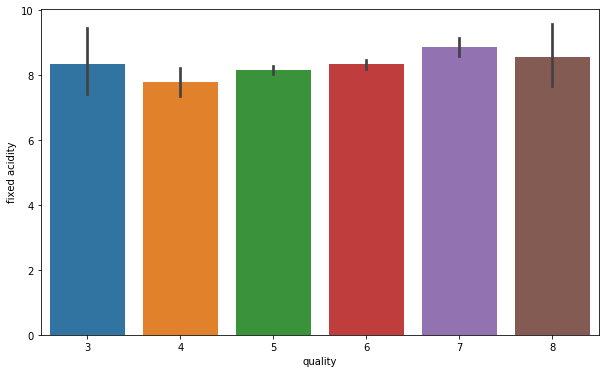

In [6]:
#Fixed acidity isn't a relevant feature when it comes to predicting wine quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

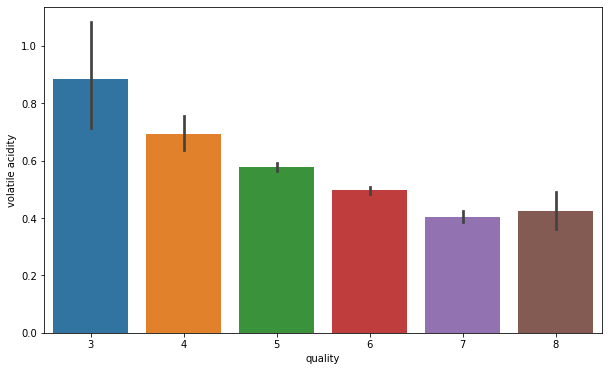

In [8]:
#Volatile acidity decreases as we move towards better wines.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

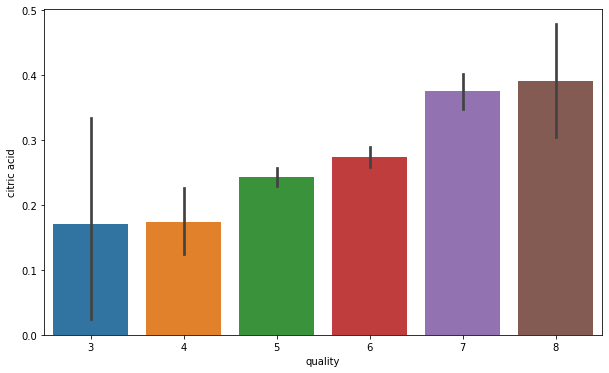

In [10]:
#Amount of citric acid increases as we move towards better wines.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

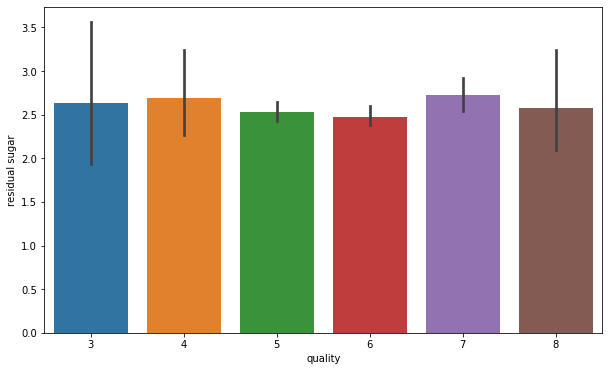

In [11]:
#Residual suger is another irrelavent feature in the dataset.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

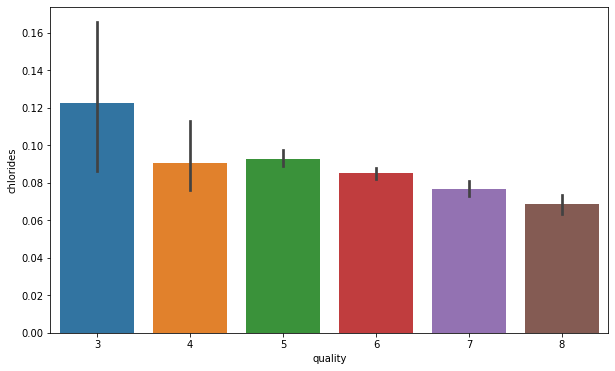

In [12]:
#Composition of chloride also go down as we go higher in the quality of the wine.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

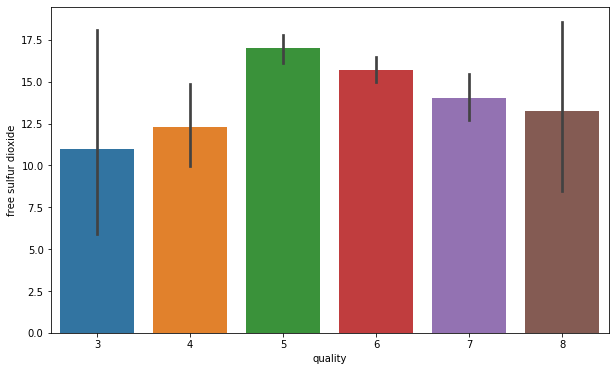

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

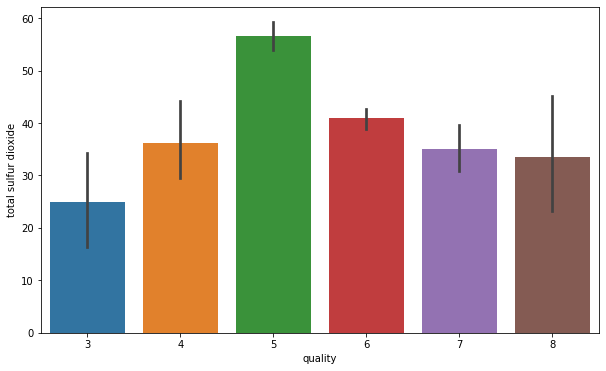

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

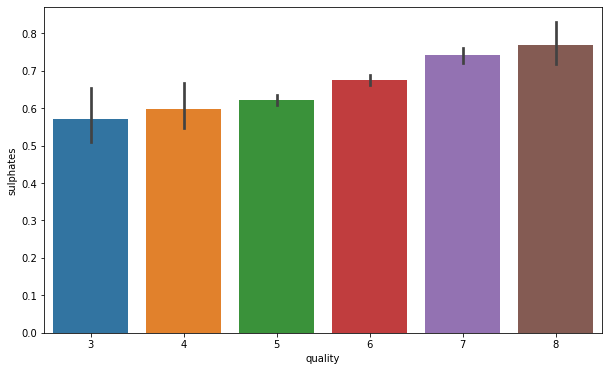

In [15]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

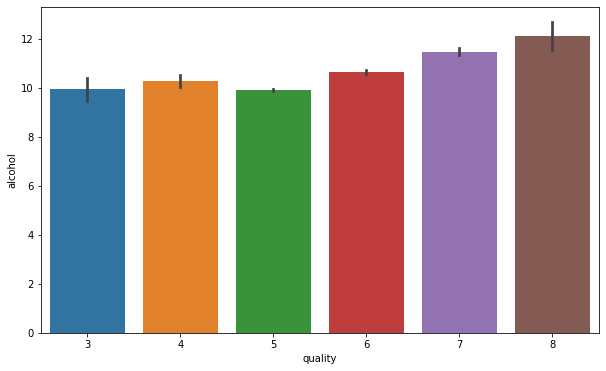

In [16]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

# Data Preprocessing

In [ ]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [22]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [23]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [24]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

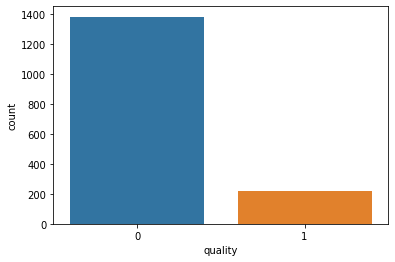

In [25]:
sns.countplot(wine['quality'])

In [29]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop(['quality', 'fixed acidity', 'residual sugar'], axis = 1)
y = wine['quality']

In [27]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [31]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Building Models

### Random Forest Classifier

In [38]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
rfc_prob = rfc.predict_proba(X_test)

In [39]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.67      0.38      0.49        47

    accuracy                           0.88       320
   macro avg       0.78      0.68      0.71       320
weighted avg       0.87      0.88      0.87       320



*Since the responce variable is unbalanced, **accuracy** isn't an honest metric to evaluate our model on. Instead we rely on **AUC score** which deals with unbalanced responce variables in a better way.*

In [40]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 29  18]]


In [83]:
# calculate roc curve for model
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, rfc_prob[:,1])
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = metrics.roc_curve(y_test, random_probs, pos_label=1)

In [84]:
from sklearn.metrics import roc_auc_score

# auc score
auc_score_rfc = roc_auc_score(y_test, rfc_prob[:,1])

print(auc_score_rfc)

0.9295845997973657


*Thus, Random Forest Classifier model reports an **AUC score** of **~0.93**.*

### Logistic Regression Classifier

In [85]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [71]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_lr))

[[268   5]
 [ 35  12]]


In [86]:
# calculate roc curve for model
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, lr_prob[:,1])


In [87]:
# auc score
auc_score_lr = roc_auc_score(y_test, lr_prob[:,1])

print(auc_score_lr)

0.8908892525913803


*Thus, Logistic Regression Classifier model reports an **AUC score** of **~0.89**.*

### KNN Classifier

In [74]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
knn_prob = knn.predict_proba(X_test)

In [75]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       273
           1       0.70      0.30      0.42        47

    accuracy                           0.88       320
   macro avg       0.79      0.64      0.67       320
weighted avg       0.86      0.88      0.86       320



In [76]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_knn))

[[267   6]
 [ 33  14]]


In [88]:
# calculate roc curve for model
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, knn_prob[:,1])


In [89]:
# auc score
auc_score_knn = roc_auc_score(y_test, knn_prob[:,1])

print(auc_score_knn)

0.8337230145740784


*Thus, KNN Classifier model reports an **AUC score** of **~0.83**.*

# Combined ROC Curve

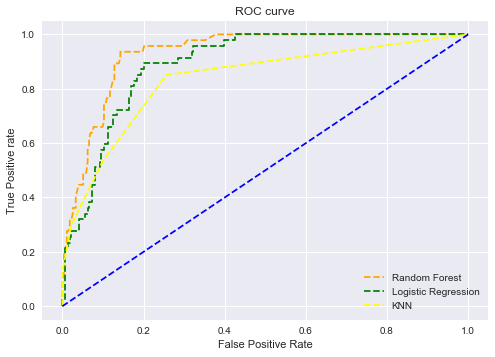

In [90]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

*In conclusion, the **Random Forest Classifier** is the optimum model with the highest **AUC score**.*

# Hyperparameter Tuning using GridSearchCV

### Random Forest Classifier

In [100]:
#Defining a search grid.

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [99]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [101]:
#Finding best parameters for our RFC model
from sklearn.model_selection import RandomizedSearchCV
grid_rfc = RandomizedSearchCV(rfc, param_distributions=random_grid, scoring='roc_auc', cv=10)

In [102]:
grid_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=200,
                                                    n_jobs=None,


In [107]:
#Best parameters
grid_rfc.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False}

In [116]:
#Let's run our classifier again with the best parameters.
rfc2 = RandomForestClassifier(n_estimators= 1000,min_samples_split= 2,min_samples_leaf= 1,max_features= 'auto',max_depth= 110,bootstrap= False)
rfc2.fit(X_train, y_train)
pred_rfc2 = rfc2.predict(X_test)
rfc2_prob = rfc2.predict_proba(X_test)
print(classification_report(y_test, pred_rfc2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       273
           1       0.70      0.45      0.55        47

    accuracy                           0.89       320
   macro avg       0.81      0.71      0.74       320
weighted avg       0.88      0.89      0.88       320



In [118]:
# auc score
auc_score_rfc2 = roc_auc_score(y_test, rfc2_prob[:,1])

print(auc_score_rfc2)

0.9374171927363417


*After applying **Randomized Grid Search** to get the best hyperparameters, we record an increase in **AUC score** from **~0.929** to **~0.937** for Random Forest Classifier model.*